# Assignment 2 - Machine learning


#### 1. The group has chosen to continue with the dataset from Ruter, and will try to predict passenger data.
#### 2. Regression will be used for this use case.
#### 3. The reason for picking regression is because of its ability to predict a continuous quantity; it will estimate a mapping function based on input and output variables. This method is suited for quantities that, in addition to the number of passengers, could be income, height, weight and scores (to mention some). 

#### 4. Training the algorithm:

In [1]:
# Imports 

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Importing the dataset from ruter
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/Ruter-data.csv'

df = pd.read_csv(url, sep=';')

df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


#### Converting to datetime
Making new columns for date, month and year as well (solving an issue with how pandas are converting from 'Dato' to datetime)

In [3]:
df.insert(2, 'Måned', pd.to_datetime(df['Dato']).dt.month)
df.insert(3, 'År', pd.to_datetime(df['Dato']).dt.year)

df['Dato'] = pd.to_datetime(df['Dato']).dt.day


In [8]:
df.head(15)

,TurId,Dato,Måned,År,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,8,10,2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15,8,2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,8,3,2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27,7,2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27,8,2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
5,3110-2020-08-01T16:16:00+02:00,8,1,2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8
6,15010-2020-07-28T13:09:00+02:00,28,7,2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,13:19:00,13:19:05,13:17:00,13:17:00,112,1
7,15003-2020-07-27T06:18:00+02:00,27,7,2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,06:20:24,06:20:29,06:20:00,06:20:00,112,-1
8,21002-2020-08-16T14:33:00+02:00,16,8,2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,15:10:12,15:10:34,15:09:00,15:09:00,112,2
9,15002-2020-08-13T18:09:00+02:00,13,8,2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,18:37:41,18:38:19,18:29:00,18:29:00,112,4


Using the same code from our last assignment to change the negative values in "Passasjerer_Ombord"

In [15]:
df["Passasjerer_Ombord"] = np.where(df["Passasjerer_Ombord"] < 0, 0, df["Passasjerer_Ombord"])

It seems that some of the rows for 'Dato' is still wrong, as it converts the date to month and month to date. We are choosing to ignore this, as long as no "month" date exceeds 12 (so there is still a logic to it all). 

<AxesSubplot:xlabel='Dato', ylabel='Passasjerer_Ombord'>

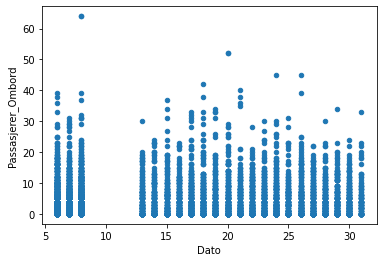

In [16]:
df.plot.scatter(x= 'Dato', y = 'Passasjerer_Ombord')

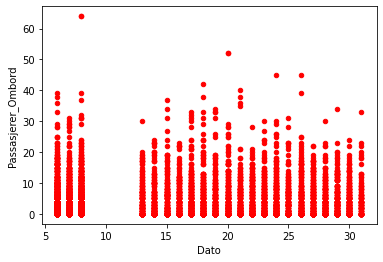

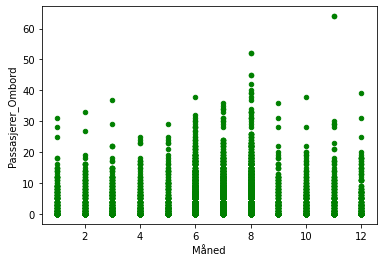

In [17]:
ax1 = df.plot(kind='scatter', x='Dato', y='Passasjerer_Ombord', color='r')
ax2 = df.plot(kind='scatter', x='Måned', y='Passasjerer_Ombord', color='g')

#### Choosing a specific but, opting for rows where 'Linjenavn' is 150.
#### We create a new table with information regarding only this bus.

In [32]:
route_31 = df[df['Linjenavn'] == "31"]
route_31.head()

,TurId,Dato,Måned,År,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
5,3110-2020-08-01T16:16:00+02:00,8,1,2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8
12,3105-2020-07-27T00:16:00+02:00,26,7,2020,Oslo,Indre By,Sentrum,Hausmanns bru (fra sentrum),Sars gate (fra sentrum),Lokal,Oslo,31,0,24:48:41,24:50:36,24:50:00,24:50:00,151,0
116,3103-2020-06-01T07:14:00+02:00,6,1,2020,Oslo,Indre By,Grünerløkka,Carl Berners plass (buss mot Sinsen) (plf C),Rosenhoff (buss mot Sinsen),Lokal,Oslo,31,0,07:55:05,07:56:17,07:56:00,07:56:00,151,15
121,3121-2020-06-29T07:27:00+02:00,29,6,2020,Oslo,Indre By,Sentrum,Hausmanns bru (fra sentrum),Sars gate (fra sentrum),Lokal,Oslo,31,0,08:01:13,08:01:58,08:01:00,08:01:00,151,13
123,3120-2020-06-02T14:40:00+02:00,6,2,2020,Oslo,Nordøst,Grorud,Kalbakkveien (fra Veitvet),Flaen (mot Grorud),Lokal,Oslo,31,0,15:44:20,15:44:54,15:42:00,15:42:00,151,2


#### Creating another table that contains only the values we consider as important for the task.

In [33]:
df_cleaned_route31 = route_31[['TurId', 'Dato', 'Måned', 'År', 'Linjenavn', 'Passasjerer_Ombord']]
df_cleaned_route31.head(15)

,TurId,Dato,Måned,År,Linjenavn,Passasjerer_Ombord
5,3110-2020-08-01T16:16:00+02:00,8,1,2020,31,8
12,3105-2020-07-27T00:16:00+02:00,26,7,2020,31,0
116,3103-2020-06-01T07:14:00+02:00,6,1,2020,31,15
121,3121-2020-06-29T07:27:00+02:00,29,6,2020,31,13
123,3120-2020-06-02T14:40:00+02:00,6,2,2020,31,2
127,3105-2020-06-23T05:21:00+02:00,23,6,2020,31,1
252,3115-2020-06-07T21:38:00+02:00,6,7,2020,31,1
257,3118-2020-06-26T21:00:00+02:00,26,6,2020,31,1
258,3103-2020-06-12T12:39:00+02:00,6,12,2020,31,11
260,3120-2020-06-05T06:00:00+02:00,6,5,2020,31,7


<AxesSubplot:xlabel='Dato', ylabel='Passasjerer_Ombord'>

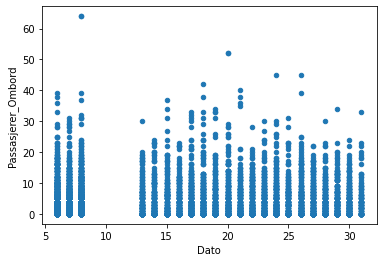

In [35]:
df.plot.scatter(x = 'Dato', y = 'Passasjerer_Ombord')

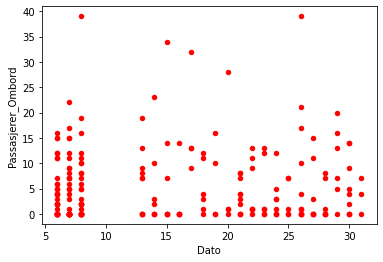

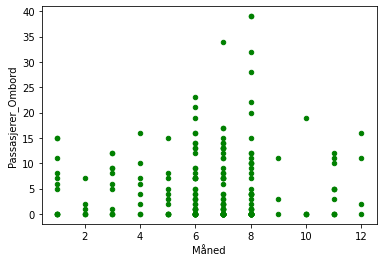

In [38]:
ax1 = df_cleaned_route31.plot(kind='scatter', x='Dato', y='Passasjerer_Ombord', color='r')
ax2 = df_cleaned_route31.plot(kind='scatter', x='Måned', y='Passasjerer_Ombord', color='g')